# Data Overviews
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class,
## Target
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes. etc).


## Data Description

### Variable Definitions

| Variable   | Definition                          | Key                                 |
|------------|-------------------------------------|-------------------------------------|
| survival   | Survival                            | 0 = No, 1 = Yes                     |
| pclass     | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex        | Sex                                 |                                     |
| Age        | Age in years                        |                                     |
| sibsp      | # of siblings / spouses aboard the Titanic |                             |
| parch      | # of parents / children aboard the Titanic |                             |
| ticket     | Ticket number                       |                                     |
| fare       | Passenger fare                      |                                     |
| cabin      | Cabin number                        |                                     |
| embarked   | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5
- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
```

In [4]:
# Suppressing Warnings
import warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import pandas, numpy, matplotlib and seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
# import the csv files 
gs = pd.read_csv("gender_submission.csv")
train_df = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [7]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print(("The number of rows and columns of gs dataset"),gs.shape)
print(("The number of rows and columns of train dataset"), train_df.shape)
print(("The number of rows and columns of test dataset"), test.shape)

The number of rows and columns of gs dataset (418, 2)
The number of rows and columns of train dataset (891, 12)
The number of rows and columns of test dataset (418, 11)


In [11]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
train_df.isnull().mean()/100 # check the null value percentages

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.001987
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.007710
Embarked       0.000022
dtype: float64

In [17]:
test.isnull().mean()/100 #chech the null values percentages

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.002057
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000024
Cabin          0.007823
Embarked       0.000000
dtype: float64

In [18]:
# Fill null values in 'Age' and 'Fare' with the median values of their respective columns
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [19]:
# drop the unneccessary column
# Drop the 'PassengerId' and 'Name' columns
train_df = train_df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [20]:
test = test.drop([ 'Name','Ticket','Cabin'], axis=1)

### Univariate Analysis

In [21]:
train_df['Sex'].value_counts() # Value Counts of Sex

Sex
male      577
female    314
Name: count, dtype: int64

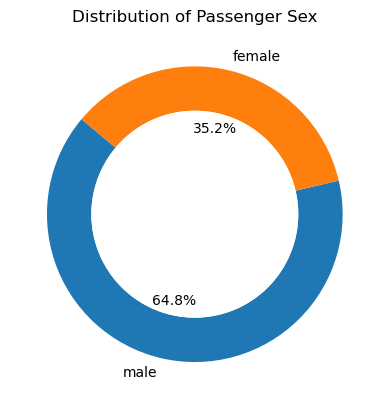

In [22]:
# Count the occurrences of each value in the 'Sex' column
sex_counts = train_df['Sex'].value_counts()

# Create the pie plot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Add a circle at the center to create a doughnut shape
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Passenger Sex')

# Display the plot
plt.show()

In [23]:
train_df['Pclass'].value_counts() # value counts of Pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

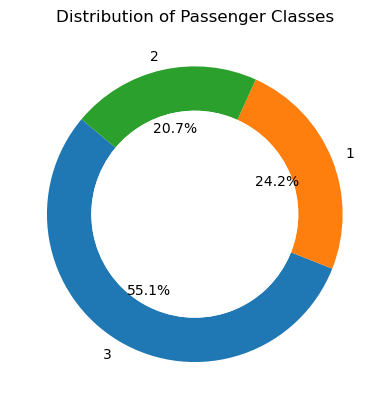

In [24]:

# Count the occurrences of each value in the 'Pclass' column
pclass_counts = train_df['Pclass'].value_counts()

# Create the pie plot
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Add a circle at the center to create a doughnut shape
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Passenger Classes')

# Display the plot
plt.show()

In [25]:
train_df['Survived'].value_counts() # Value counts of Survived

Survived
0    549
1    342
Name: count, dtype: int64

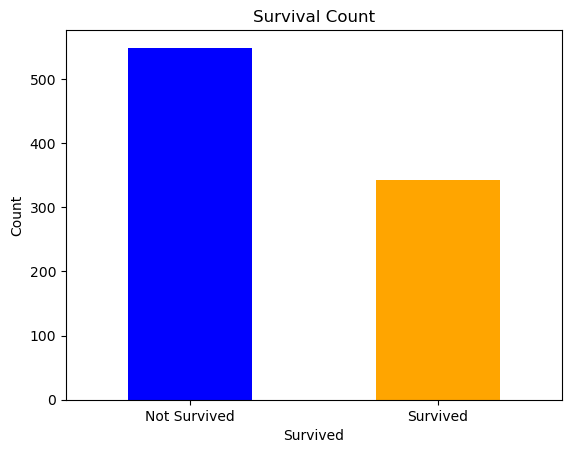

In [26]:
# Count the occurrences of each value in the 'Survived' column
survived_counts = train_df['Survived'].value_counts()

# Create the bar plot
survived_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
plt.show()

In [27]:
train_df['Embarked'].value_counts() # value counts of Embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

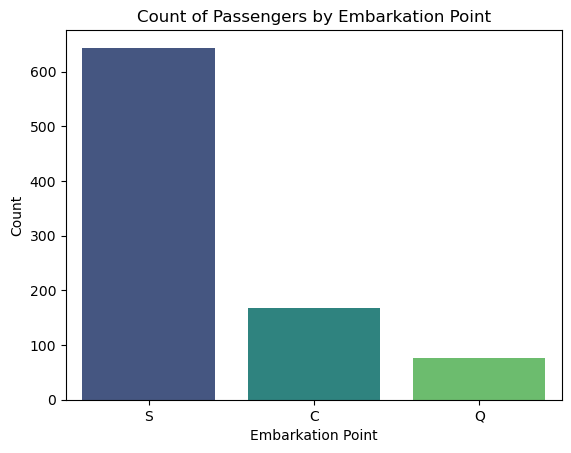

In [28]:

# Create the count plot for the 'Embarked' column

sns.countplot(data=train_df, x='Embarked', palette='viridis')

# Add title and labels
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

# Display the plot
plt.show()


In [29]:
train_df['SibSp'].value_counts() # value counts of SibSp

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [30]:
train_df['Parch'].value_counts() # value counts of Parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [31]:
# let's join the two columns and place the value in new column
# Create the new column 'total_member'
train_df['total_member'] = train_df['SibSp'] + train_df['Parch']

In [32]:
# Create the 'family_size' column based on the 'total_member' column
train_df['family_size'] = train_df['total_member'].apply(
    lambda x: 'single person' if x == 0 else ('medium family' if 1 <= x <= 4 else 'large family')
)

In [33]:
train_df['family_size'].value_counts() # value counts of family size

family_size
single person    537
medium family    307
large family      47
Name: count, dtype: int64

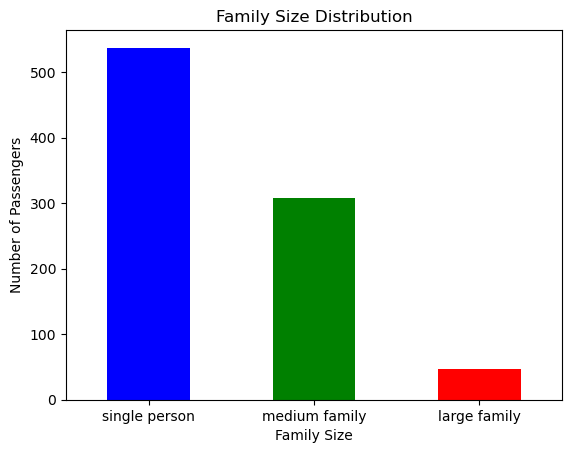

In [34]:
# Count the occurrences of each family size category
family_size_counts = train_df['family_size'].value_counts()

# Plot the family size distribution
family_size_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

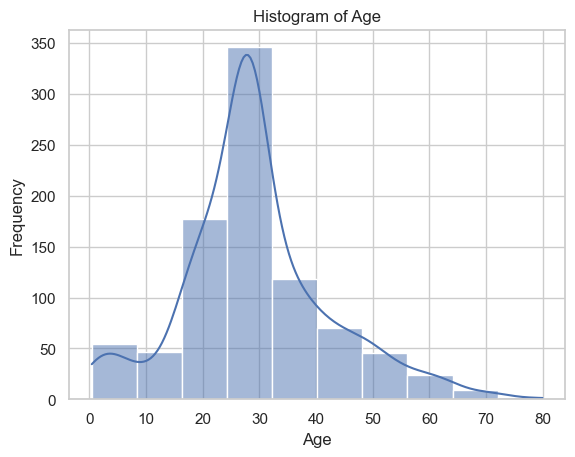

In [35]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram for the 'Age' column
sns.histplot(train_df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

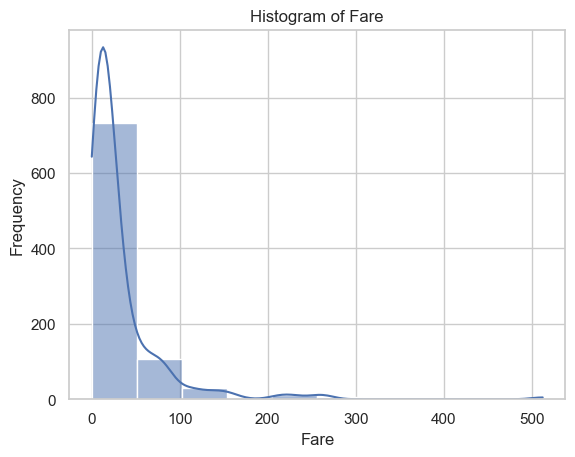

In [36]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram for the 'Age' column
sns.histplot(train_df['Fare'], bins=10, kde=True)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Multivariate Analysis

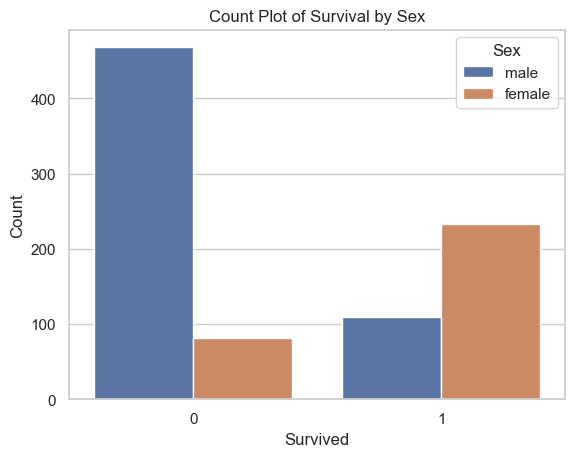

In [37]:
# Create a count plot for the 'Survived' and 'Sex' columns
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title('Count Plot of Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

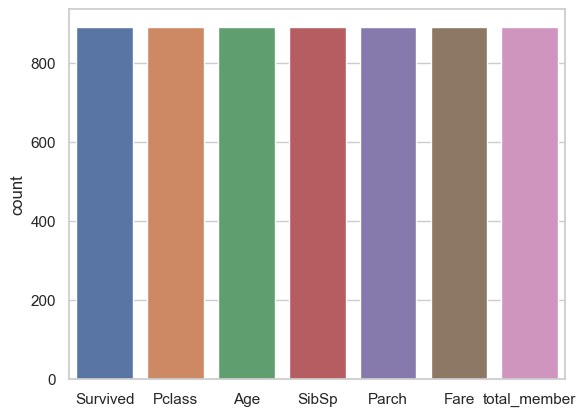

In [40]:
# Convert the 'Pclass' column to string type
train_df['pclass'] = train_df['Pclass'].astype(str)

# Create a count plot for the 'Survived' and 'Pclass' columns
sns.countplot(data=train_df)

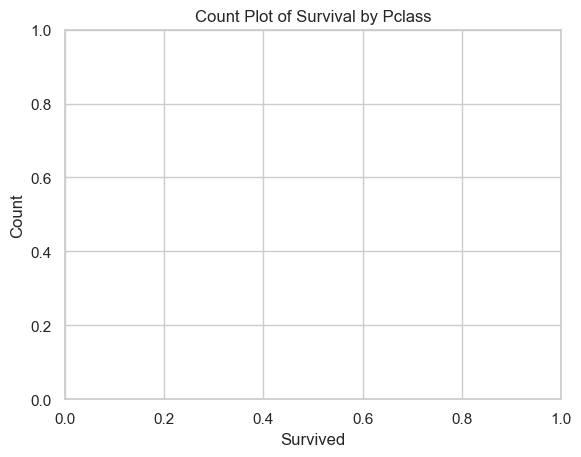

In [41]:
, x='Survived', hue='pclass')
plt.title('Count Plot of Survival by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [42]:
# Create a cross-tabulation table to count the number of passengers who survived and didn't survive for each embarked port
survived_counts = pd.crosstab(train_df['Embarked'], train_df['Survived'])

# Print the count of passengers who didn't survive and survived for each embarked port
print("Count of passengers who didn't survive and survived for each embarked port:")
print(survived_counts)


Count of passengers who didn't survive and survived for each embarked port:
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


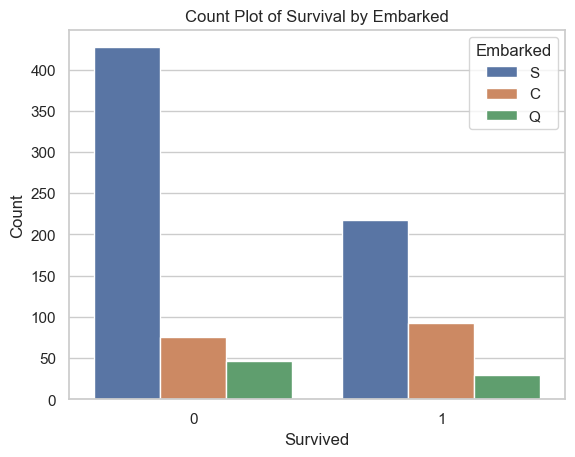

In [43]:
# Create a count plot for the 'Survived' and 'Embarked' columns
sns.countplot(data=train_df, x='Survived', hue='Embarked')
plt.title('Count Plot of Survival by Embarked')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [44]:
# Create a cross-tabulation table to count the number of passengers who survived and didn't survive for each embarked port
survived_counts = pd.crosstab(train_df['Embarked'], train_df['family_size'])

# Print the count of passengers who didn't survive and survived for each embarked port
print("Count of passengers who didn't survive and survived for family_size feature:")
print(survived_counts)


Count of passengers who didn't survive and survived for family_size feature:
family_size  large family  medium family  single person
Embarked                                               
C                       0             83             85
Q                       5             15             57
S                      42            209            393


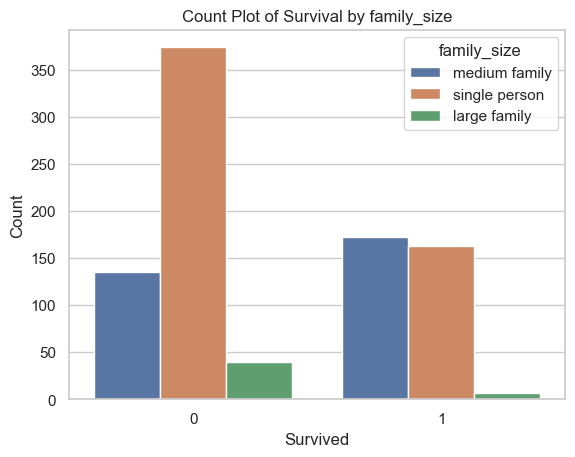

In [45]:
# Create a count plot for the 'Survived' and 'family_size' columns
sns.countplot(data=train_df, x='Survived', hue='family_size')
plt.title('Count Plot of Survival by family_size')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

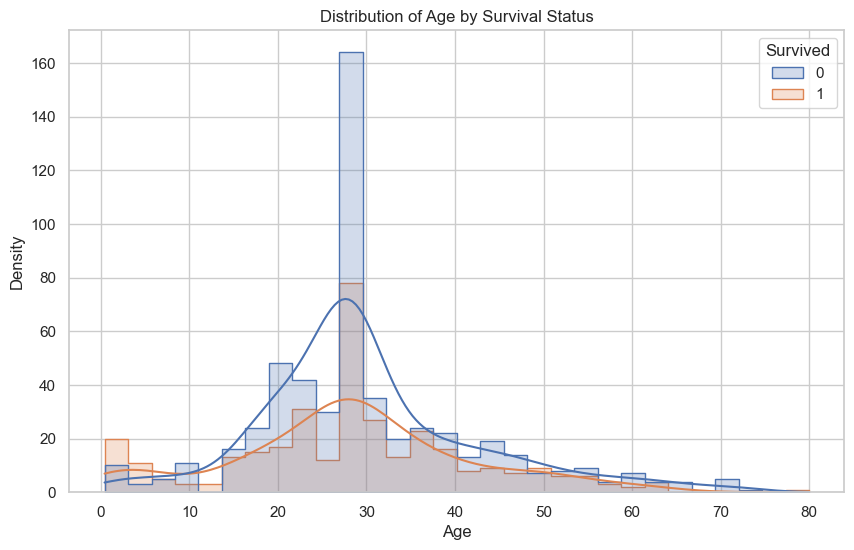

In [46]:
plt.figure(figsize=(10, 6))
# Create a distplot for Age, separated by Survived
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, element='step')
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


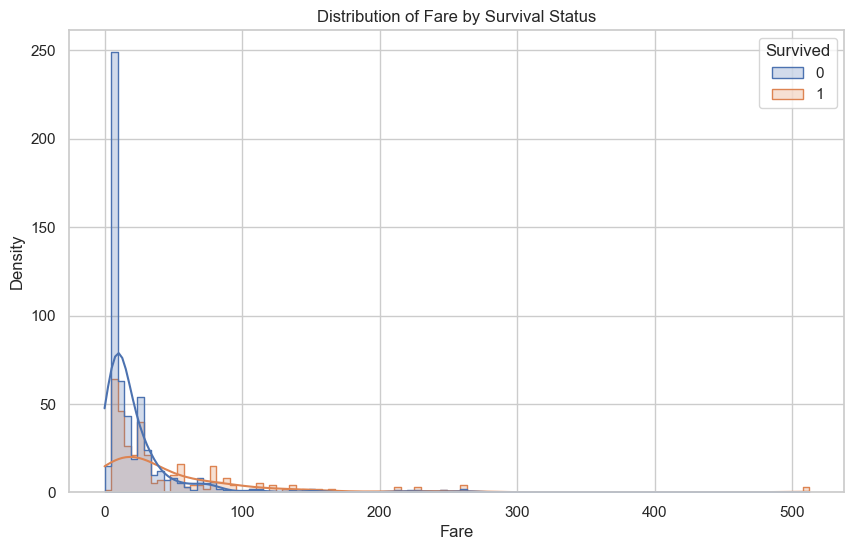

In [47]:
plt.figure(figsize = (10,6))
# Create a distplot for Age, separated by Survived
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, element='step')

plt.title('Distribution of Fare by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

In [48]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_member,family_size,pclass
0,0,3,male,22.0,1,0,7.2500,S,1,medium family,3
1,1,1,female,38.0,1,0,71.2833,C,1,medium family,1
2,1,3,female,26.0,0,0,7.9250,S,0,single person,3


In [49]:
# Convert 'Sex' column to binary values: 'male' to 1 and 'female' to 0
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

In [50]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_member,family_size,pclass
0,0,3,1,22.0,1,0,7.2500,S,1,medium family,3
1,1,1,0,38.0,1,0,71.2833,C,1,medium family,1
2,1,3,0,26.0,0,0,7.9250,S,0,single person,3


In [51]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q


In [52]:

# Create dummy variables for the 'Embarked' and 'Cabin' columns with appropriate prefixes
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix=['Embarked'])

# Display the DataFrame to confirm the changes
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,total_member,family_size,pclass,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,1,medium family,3,False,False,True
1,1,1,0,38.0,1,0,71.2833,1,medium family,1,True,False,False
2,1,3,0,26.0,0,0,7.9250,0,single person,3,False,False,True
3,1,1,0,35.0,1,0,53.1000,1,medium family,1,False,False,True
4,0,3,1,35.0,0,0,8.0500,0,single person,3,False,False,True


In [53]:
# Fetch columns with object data type
object_columns = train_df.select_dtypes(include='bool').columns
train_df[object_columns] = train_df[object_columns].astype('int')

In [54]:
# drop the new made columns
train_df = train_df.drop(['total_member','family_size'],axis =1)

In [55]:
train_df = train_df.drop(['pclass'],axis =1)

In [56]:
#### Lets find the oorelation
# Calculate correlations
correlation_matrix = train_df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.014665
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.014665,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


In [57]:
# Set a threshold for correlation
threshold = 0.8

# Calculate correlations
correlation_matrix = train_df.corr()

# Find column pairs with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Column pairs with correlation above the threshold:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")


Column pairs with correlation above the threshold:


In [58]:
# Putting features variable to x
X_train= train_df.drop(['Survived'], axis =1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [59]:
# create the Y data set with the column Converted
y_train = train_df['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
# checking the Survived Rate
Survived = (sum(train_df['Survived'])/len(train_df['Survived'].index))*100
Survived

38.38383838383838

The Survival rate is 38%. Thats mean maximum number of people can not survived

In [61]:
# import the StandardScaler
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,-0.565736,1,0,-0.502445,0,0,1
1,1,0,0.663861,1,0,0.786845,1,0,0
2,3,0,-0.258337,0,0,-0.488854,0,0,1
3,1,0,0.433312,1,0,0.420730,0,0,1
4,3,1,0.433312,0,0,-0.486337,0,0,1


## model building

In [63]:
import statsmodels.api as sm

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with logistic regression estimator and number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [65]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [66]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [67]:
# Building Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.47
Date:                Mon, 12 Aug 2024   Deviance:                       784.93
Time:                        12:55:36   Pearson chi2:                     902.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3629
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4470   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Pclass        -1.0987      0.144     -7.654      0.000      -1.380      -0.817
Sex           -2.7199      0.201    -13.555      0.000      -3.113      -2.327
Age           -0.5118      0.102     -5.013      0.000      -0.712      -0.312
SibSp         -0.3242      0.109     -2.978      0.003      -0.538      -0.111
Parch         -0.0886      0.119     -0.748      0.454      -0.321       0.144
Fare           0.0963      0.118      0.817      0.414      -0.135       0.327
Embarked_C   -18.2924   1.23e+04     -0.001      0.999   -2.41e+04     2.4e+04
Embarked_Q   -18.3552   1.23e+04     -0.001      0.999   -2.41e+04     2.4e+04
Embarked_S   -18.7039   1.23e+04     -0.002      0.999   -2.41e+04     2.4e+04
==============================================================================
"""

In [68]:
#dropping column with high p-value

col = col.drop('Embarked_C',1)

In [69]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.67
Date:                Mon, 12 Aug 2024   Deviance:                       785.34
Time:                        12:55:37   Pearson chi2:                     903.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3626
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1690      0.409     10.183      0.000       3.367       4.971
Pclass        -1.0999      0.144     -7.659      0.000      -1.381      -0.818
Sex           -2.7260      0.201    -13.596      0.000      -3.119      -2.333
Age           -0.5094      0.102     -4.999      0.000      -0.709      -0.310
SibSp         -0.3246      0.109     -2.978      0.003      -0.538      -0.111
Parch         -0.0899      0.119     -0.759      0.448      -0.322       0.142
Fare           0.0969      0.118      0.820      0.412      -0.135       0.328
Embarked_Q    -0.0705      0.381     -0.185      0.853      -0.818       0.677
Embarked_S    -0.4186      0.236     -1.772      0.076      -0.882       0.044
==============================================================================
"""

In [70]:
#dropping column with high p-value

col = col.drop('Embarked_Q',1)

In [71]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.69
Date:                Mon, 12 Aug 2024   Deviance:                       785.37
Time:                        12:55:37   Pearson chi2:                     905.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3626
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1563      0.403     10.308      0.000       3.366       4.947
Pclass        -1.1057      0.140     -7.891      0.000      -1.380      -0.831
Sex           -2.7220      0.199    -13.665      0.000      -3.112      -2.332
Age           -0.5105      0.102     -5.019      0.000      -0.710      -0.311
SibSp         -0.3246      0.109     -2.981      0.003      -0.538      -0.111
Parch         -0.0880      0.118     -0.746      0.456      -0.319       0.143
Fare           0.0981      0.118      0.832      0.406      -0.133       0.329
Embarked_S    -0.3960      0.202     -1.957      0.050      -0.793       0.001
==============================================================================
"""

In [72]:
#dropping column with high p-value

col = col.drop('Parch',1)

In [73]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.97
Date:                Mon, 12 Aug 2024   Deviance:                       785.93
Time:                        12:55:37   Pearson chi2:                     910.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3622
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1451      0.402     10.316      0.000       3.358       4.933
Pclass        -1.1168      0.139     -8.032      0.000      -1.389      -0.844
Sex           -2.6920      0.195    -13.838      0.000      -3.073      -2.311
Age           -0.5075      0.101     -5.002      0.000      -0.706      -0.309
SibSp         -0.3456      0.106     -3.270      0.001      -0.553      -0.138
Fare           0.0786      0.113      0.697      0.486      -0.143       0.300
Embarked_S    -0.4084      0.201     -2.027      0.043      -0.803      -0.014
==============================================================================
"""

In [74]:
#dropping column with high p-value

col = col.drop('Fare',1)

In [75]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.22
Date:                Mon, 12 Aug 2024   Deviance:                       786.44
Time:                        12:55:37   Pearson chi2:                     912.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3618
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2683      0.363     11.757      0.000       3.557       4.980
Pclass        -1.1660      0.121     -9.674      0.000      -1.402      -0.930
Sex           -2.6990      0.194    -13.896      0.000      -3.080      -2.318
Age           -0.5110      0.101     -5.045      0.000      -0.709      -0.312
SibSp         -0.3303      0.103     -3.203      0.001      -0.532      -0.128
Embarked_S    -0.4342      0.198     -2.193      0.028      -0.822      -0.046
==============================================================================
"""

In [76]:
# import variance inflation factor from stats model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# create a dataframe where we see the all features and their vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,4.29
4,Embarked_S,3.24
1,Sex,2.87
3,SibSp,1.29
2,Age,1.11


The VIF 's are Under control as its values are below 5

In [78]:
# Let's check the predicted value on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.082849
1    0.919293
2    0.614910
3    0.892481
4    0.070144
5    0.132925
6    0.269227
7    0.092842
8    0.605570
9    0.901074
dtype: float64

In [79]:
# Let's compare the original and predicted( on train dataset) target value
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_prob,PassengerId
0,0,0.082849,0
1,1,0.919293,1
2,1,0.614910,2
3,1,0.892481,3
4,0,0.070144,4


In [80]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Survived,Survived_prob,PassengerId,Predicted
0,0,0.082849,0,0
1,1,0.919293,1,1
2,1,0.614910,2,1
3,1,0.892481,3,1
4,0,0.070144,4,0
5,0,0.132925,5,0
6,0,0.269227,6,0
7,0,0.092842,7,0
8,1,0.605570,8,1
9,1,0.901074,9,1


In [81]:
from sklearn import metrics  # import the metrics from sklearn

# Check the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted)
print(confusion)

[[461  88]
 [ 95 247]]


In [82]:
# Let's check the overall accuracy.
print('Accuracy:',(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Predicted)))

Accuracy: 0.7946127946127947


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity',(TP / float(TP+FN)))

Sensitivity 0.7222222222222222


In [85]:
# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))

Specificity: 0.8397085610200364


In [86]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print('False positive rate:',(FP/ float(TN+FP)))

False positive rate: 0.16029143897996356


In [87]:
# positive predictive value 
print('Positive predictive rate:', (TP / float(TP+FP)))

Positive predictive rate: 0.7373134328358208


In [88]:
# Negative predictive value
print('Negetive predictive rate:', (TN / float(TN+ FN)))

Negetive predictive rate: 0.829136690647482


In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_prob, drop_intermediate = False )

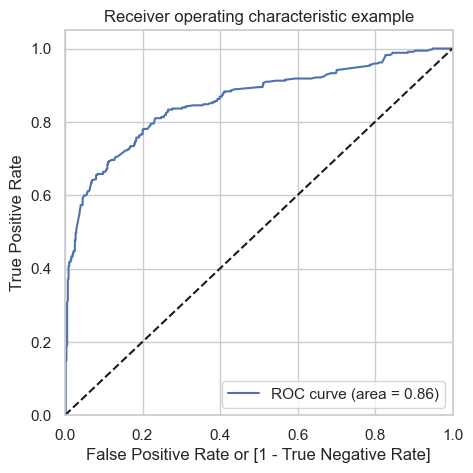

In [91]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082849,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.919293,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614910,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.892481,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.070144,4,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.558923  0.923977  0.331512
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.771044  0.824561  0.737705
0.4   0.4  0.790123  0.760234  0.808743
0.5   0.5  0.794613  0.722222  0.839709
0.6   0.6  0.817059  0.657895  0.916211
0.7   0.7  0.792368  0.505848  0.970856
0.8   0.8  0.754209  0.374269  0.990893
0.9   0.9  0.689113  0.198830  0.994536


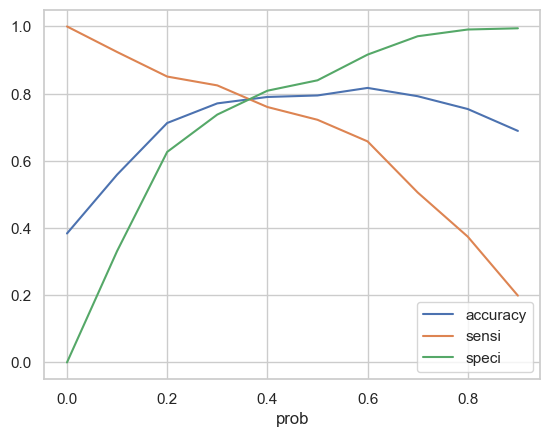

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(10)

,Survived,Survived_prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.082849,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.919293,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.614910,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.892481,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.070144,4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0.132925,5,0,1,1,0,0,0,0,0,0,0,0,0
6,0,0.269227,6,0,1,1,1,0,0,0,0,0,0,0,0
7,0,0.092842,7,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0.605570,8,1,1,1,1,1,1,1,1,0,0,0,1
9,1,0.901074,9,1,1,1,1,1,1,1,1,1,1,1,1


In [96]:
# Let's check the overall accuracy.
print("Accuracy:", metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted))


Accuracy: 0.7901234567901234


In [97]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[444, 105],
       [ 82, 260]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",(TP / float(TP+FN)))

Sensitivity: 0.7602339181286549


In [100]:
# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))

Specificity: 0.8087431693989071


In [101]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False positive rate:',(FP/ float(TN+FP)))

False positive rate: 0.1912568306010929


In [102]:
# Positive predictive value 
print('Positive predictive rate:',(TP / float(TP+FP)))

Positive predictive rate: 0.7123287671232876


In [103]:
# Negative predictive value
print('Negetive predictive rate:', (TN / float(TN+ FN)))

Negetive predictive rate: 0.844106463878327


In [104]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted )
confusion

array([[461,  88],
       [ 95, 247]], dtype=int64)

In [105]:
##### Precision
TP / TP + FP

print('Pricision:',(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Pricision: 0.7373134328358208


In [106]:
# Recall
print('Recall:',(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Recall: 0.7222222222222222


In [107]:
from sklearn.metrics import precision_recall_curve # Import the precision curve from the sk learn

In [108]:
y_train_pred_final.Survived, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

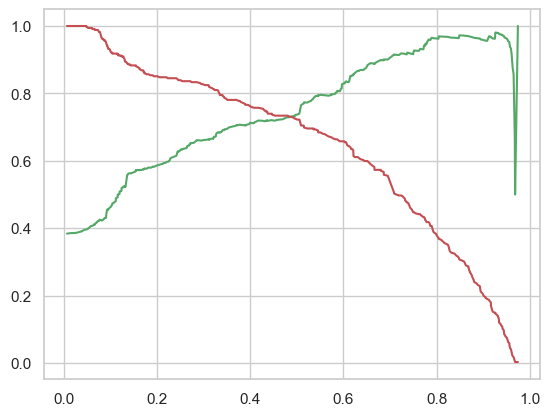

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [110]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [111]:
test.shape

(418, 8)

In [112]:
scaler = StandardScaler()
test[['Age','Fare']] = scaler.fit_transform(test[['Age','Fare']])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.386231,0,0,-0.497413,Q
1,893,3,0,1.371370,1,0,-0.512278,S
2,894,2,1,2.553537,0,0,-0.464100,Q
3,895,3,1,-0.204852,0,0,-0.482475,S
4,896,3,0,-0.598908,1,1,-0.417492,S


In [113]:

# Create dummy variables for the 'Embarked' and 'Cabin' columns with appropriate prefixes
test = pd.get_dummies(test, columns=['Embarked'], prefix=['Embarked'])


In [114]:
# Fetch columns with object data type
object_columns = test.select_dtypes(include='bool').columns
test[object_columns] = test[object_columns].astype('int')

In [115]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.386231,0,0,-0.497413,0,1,0
1,893,3,0,1.371370,1,0,-0.512278,0,0,1
2,894,2,1,2.553537,0,0,-0.464100,0,1,0
3,895,3,1,-0.204852,0,0,-0.482475,0,0,1
4,896,3,0,-0.598908,1,1,-0.417492,0,0,1


In [116]:
# Putting features variable to x
X_test= test.drop(['PassengerId','Parch','Fare','Embarked_C','Embarked_Q'], axis =1)
X_test.head()

,Pclass,Sex,Age,SibSp,Embarked_S
0,3,1,0.386231,0,0
1,3,0,1.371370,1,1
2,2,1,2.553537,0,0
3,3,1,-0.204852,0,1
4,3,0,-0.598908,1,1


In [117]:
X_test_sm = sm.add_constant(X_test[col])

In [118]:
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test_pred[:10]

0    0.106579
1    0.332911
2    0.112284
3    0.094629
4    0.577311
5    0.149969
6    0.680071
7    0.200630
8    0.775104
9    0.064326
dtype: float64

In [120]:
test.shape

(418, 10)

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1= pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

,0
0,0.106579
1,0.332911
2,0.112284
3,0.094629
4,0.577311


In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([test, y_pred_1],axis=1)
y_pred_final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,0
0,892,3,1,0.386231,0,0,-0.497413,0,1,0,0.106579
1,893,3,0,1.371370,1,0,-0.512278,0,0,1,0.332911
2,894,2,1,2.553537,0,0,-0.464100,0,1,0,0.112284
3,895,3,1,-0.204852,0,0,-0.482475,0,0,1,0.094629
4,896,3,0,-0.598908,1,1,-0.417492,0,0,1,0.577311


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_prob'})
y_pred_final.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived_prob
0,892,3,1,0.386231,0,0,-0.497413,0,1,0,0.106579
1,893,3,0,1.371370,1,0,-0.512278,0,0,1,0.332911


In [125]:
y_pred_final = y_pred_final[['PassengerId','Survived_prob']]

In [126]:
y_pred_final.head(2)

,PassengerId,Survived_prob
0,892,0.106579
1,893,0.332911


In [127]:
y_pred_final.shape

(418, 2)

In [128]:
y_pred_final['survived'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,PassengerId,Survived_prob,survived
0,892,0.106579,0
1,893,0.332911,0
2,894,0.112284,0
3,895,0.094629,0
4,896,0.577311,1


In [129]:
# Create the new dataset with Passengerid and survived columns
gender_submission_pred = y_pred_final[['PassengerId', 'survived']]

# Display the first few rows of the new dataset
print(gender_submission_pred.head())


   PassengerId  survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [130]:
gender_submission_pred.shape

(418, 2)

In [131]:
# Export the dataset to a CSV file
gender_submission_pred.to_csv('gender_submission_pred.csv', index=False)